# **Import environments**

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


# **The dataset**


## Get the data
First download and import the dataset using pandas:

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1vy7MEUdUpR5p0Fw0j9iO9n3mHuc5ekdL'
output_weka = 'weka_14de.csv'
gdown.download(url, output_weka, quiet=False)
column_names = ['mol', 'name', 'pIC50', 'ast_fraglike', 'b_triple', 'density', 'FCharge', 'GCUT_PEOE_0', 'GCUT_PEOE_2', 'GCUT_SLOGP_1', 'logP(o/w)', 'PEOE_RPC+', 'PEOE_VSA-0', 'PEOE_VSA_FPOL', 'Q_VSA_FPNEG', 'Q_VSA_FPPOS', 'VDistEq']


Downloading...
From: https://drive.google.com/uc?id=1vy7MEUdUpR5p0Fw0j9iO9n3mHuc5ekdL
To: /content/weka_14de.csv
100%|██████████| 215k/215k [00:00<00:00, 21.7MB/s]


In [ ]:
raw_dataset = pd.read_csv('weka_14de.csv', usecols = ['pIC50', 'ast_fraglike', 'b_triple', 'density', 'FCharge', 'GCUT_PEOE_0', 'GCUT_PEOE_2', 'GCUT_SLOGP_1', 'logP(o/w)', 'PEOE_RPC+', 'PEOE_VSA-0', 'PEOE_VSA_FPOL', 'Q_VSA_FPNEG', 'Q_VSA_FPPOS', 'VDistEq'])
raw_dataset

,pIC50,ast_fraglike,b_triple,density,FCharge,GCUT_PEOE_0,GCUT_PEOE_2,GCUT_SLOGP_1,logP(o/w),PEOE_RPC+,PEOE_VSA-0,PEOE_VSA_FPOL,Q_VSA_FPNEG,Q_VSA_FPPOS,VDistEq
0,8.903090,0,0,0.682630,0,-0.858634,0.015161,-0.288504,3.42400,0.101101,109.272090,0.072851,0.049094,0.073579,3.739490
1,8.619789,0,0,0.678925,0,-0.805862,-0.074633,-0.264035,6.31653,0.097871,80.520355,0.096639,0.260149,0.064148,3.829313
2,8.507239,0,0,0.692067,0,-0.849730,0.060939,-0.282912,3.20500,0.096712,109.272090,0.121055,0.070813,0.102925,3.512355
3,8.397940,0,0,0.684591,0,-0.850045,-0.007727,-0.276545,4.15900,0.111754,109.272090,0.042595,0.042595,0.057385,3.466409
4,8.392545,0,0,0.654352,0,-0.861113,-0.044011,-0.257950,5.27500,0.131147,135.656750,0.034706,0.130623,0.055385,3.385524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,3.241845,1,0,0.677270,0,-0.845813,0.076440,-0.356137,2.92100,0.137415,51.958797,0.073326,0.169424,0.066998,3.280470
920,3.241088,1,0,0.677270,0,-0.845813,0.076440,-0.356137,2.92100,0.137415,51.958797,0.073326,0.169424,0.066998,3.280470
921,3.234331,1,0,0.677270,0,-0.845813,0.076440,-0.356137,2.92100,0.137415,51.958797,0.073326,0.169424,0.066998,3.280470
922,2.886057,0,0,0.710662,0,-0.831416,0.020134,-0.311317,1.34700,0.133949,57.106522,0.192622,0.310762,0.178096,3.149288


In [ ]:
dataset = raw_dataset.copy()
dataset

,pIC50,ast_fraglike,b_triple,density,FCharge,GCUT_PEOE_0,GCUT_PEOE_2,GCUT_SLOGP_1,logP(o/w),PEOE_RPC+,PEOE_VSA-0,PEOE_VSA_FPOL,Q_VSA_FPNEG,Q_VSA_FPPOS,VDistEq
0,8.903090,0,0,0.682630,0,-0.858634,0.015161,-0.288504,3.42400,0.101101,109.272090,0.072851,0.049094,0.073579,3.739490
1,8.619789,0,0,0.678925,0,-0.805862,-0.074633,-0.264035,6.31653,0.097871,80.520355,0.096639,0.260149,0.064148,3.829313
2,8.507239,0,0,0.692067,0,-0.849730,0.060939,-0.282912,3.20500,0.096712,109.272090,0.121055,0.070813,0.102925,3.512355
3,8.397940,0,0,0.684591,0,-0.850045,-0.007727,-0.276545,4.15900,0.111754,109.272090,0.042595,0.042595,0.057385,3.466409
4,8.392545,0,0,0.654352,0,-0.861113,-0.044011,-0.257950,5.27500,0.131147,135.656750,0.034706,0.130623,0.055385,3.385524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,3.241845,1,0,0.677270,0,-0.845813,0.076440,-0.356137,2.92100,0.137415,51.958797,0.073326,0.169424,0.066998,3.280470
920,3.241088,1,0,0.677270,0,-0.845813,0.076440,-0.356137,2.92100,0.137415,51.958797,0.073326,0.169424,0.066998,3.280470
921,3.234331,1,0,0.677270,0,-0.845813,0.076440,-0.356137,2.92100,0.137415,51.958797,0.073326,0.169424,0.066998,3.280470
922,2.886057,0,0,0.710662,0,-0.831416,0.020134,-0.311317,1.34700,0.133949,57.106522,0.192622,0.310762,0.178096,3.149288


## Clean the data
The dataset contains a few unknown values:

In [ ]:
dataset.isna().sum()

pIC50            0
ast_fraglike     0
b_triple         0
density          0
FCharge          0
GCUT_PEOE_0      0
GCUT_PEOE_2      0
GCUT_SLOGP_1     0
logP(o/w)        0
PEOE_RPC+        0
PEOE_VSA-0       0
PEOE_VSA_FPOL    0
Q_VSA_FPNEG      0
Q_VSA_FPPOS      0
VDistEq          0
dtype: int64

Drop those rows to keep this initial tutorial simple:

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset

,pIC50,ast_fraglike,b_triple,density,FCharge,GCUT_PEOE_0,GCUT_PEOE_2,GCUT_SLOGP_1,logP(o/w),PEOE_RPC+,PEOE_VSA-0,PEOE_VSA_FPOL,Q_VSA_FPNEG,Q_VSA_FPPOS,VDistEq
0,8.903090,0,0,0.682630,0,-0.858634,0.015161,-0.288504,3.42400,0.101101,109.272090,0.072851,0.049094,0.073579,3.739490
1,8.619789,0,0,0.678925,0,-0.805862,-0.074633,-0.264035,6.31653,0.097871,80.520355,0.096639,0.260149,0.064148,3.829313
2,8.507239,0,0,0.692067,0,-0.849730,0.060939,-0.282912,3.20500,0.096712,109.272090,0.121055,0.070813,0.102925,3.512355
3,8.397940,0,0,0.684591,0,-0.850045,-0.007727,-0.276545,4.15900,0.111754,109.272090,0.042595,0.042595,0.057385,3.466409
4,8.392545,0,0,0.654352,0,-0.861113,-0.044011,-0.257950,5.27500,0.131147,135.656750,0.034706,0.130623,0.055385,3.385524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,3.241845,1,0,0.677270,0,-0.845813,0.076440,-0.356137,2.92100,0.137415,51.958797,0.073326,0.169424,0.066998,3.280470
920,3.241088,1,0,0.677270,0,-0.845813,0.076440,-0.356137,2.92100,0.137415,51.958797,0.073326,0.169424,0.066998,3.280470
921,3.234331,1,0,0.677270,0,-0.845813,0.076440,-0.356137,2.92100,0.137415,51.958797,0.073326,0.169424,0.066998,3.280470
922,2.886057,0,0,0.710662,0,-0.831416,0.020134,-0.311317,1.34700,0.133949,57.106522,0.192622,0.310762,0.178096,3.149288


## Split the data into training and test sets
Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your models.

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

## Inspect the data
Review the joint distribution of a few pairs of columns from the training set.

The top row suggests that the fuel efficiency (MPG) is a function of all the other parameters. The other rows indicate they are functions of each other.

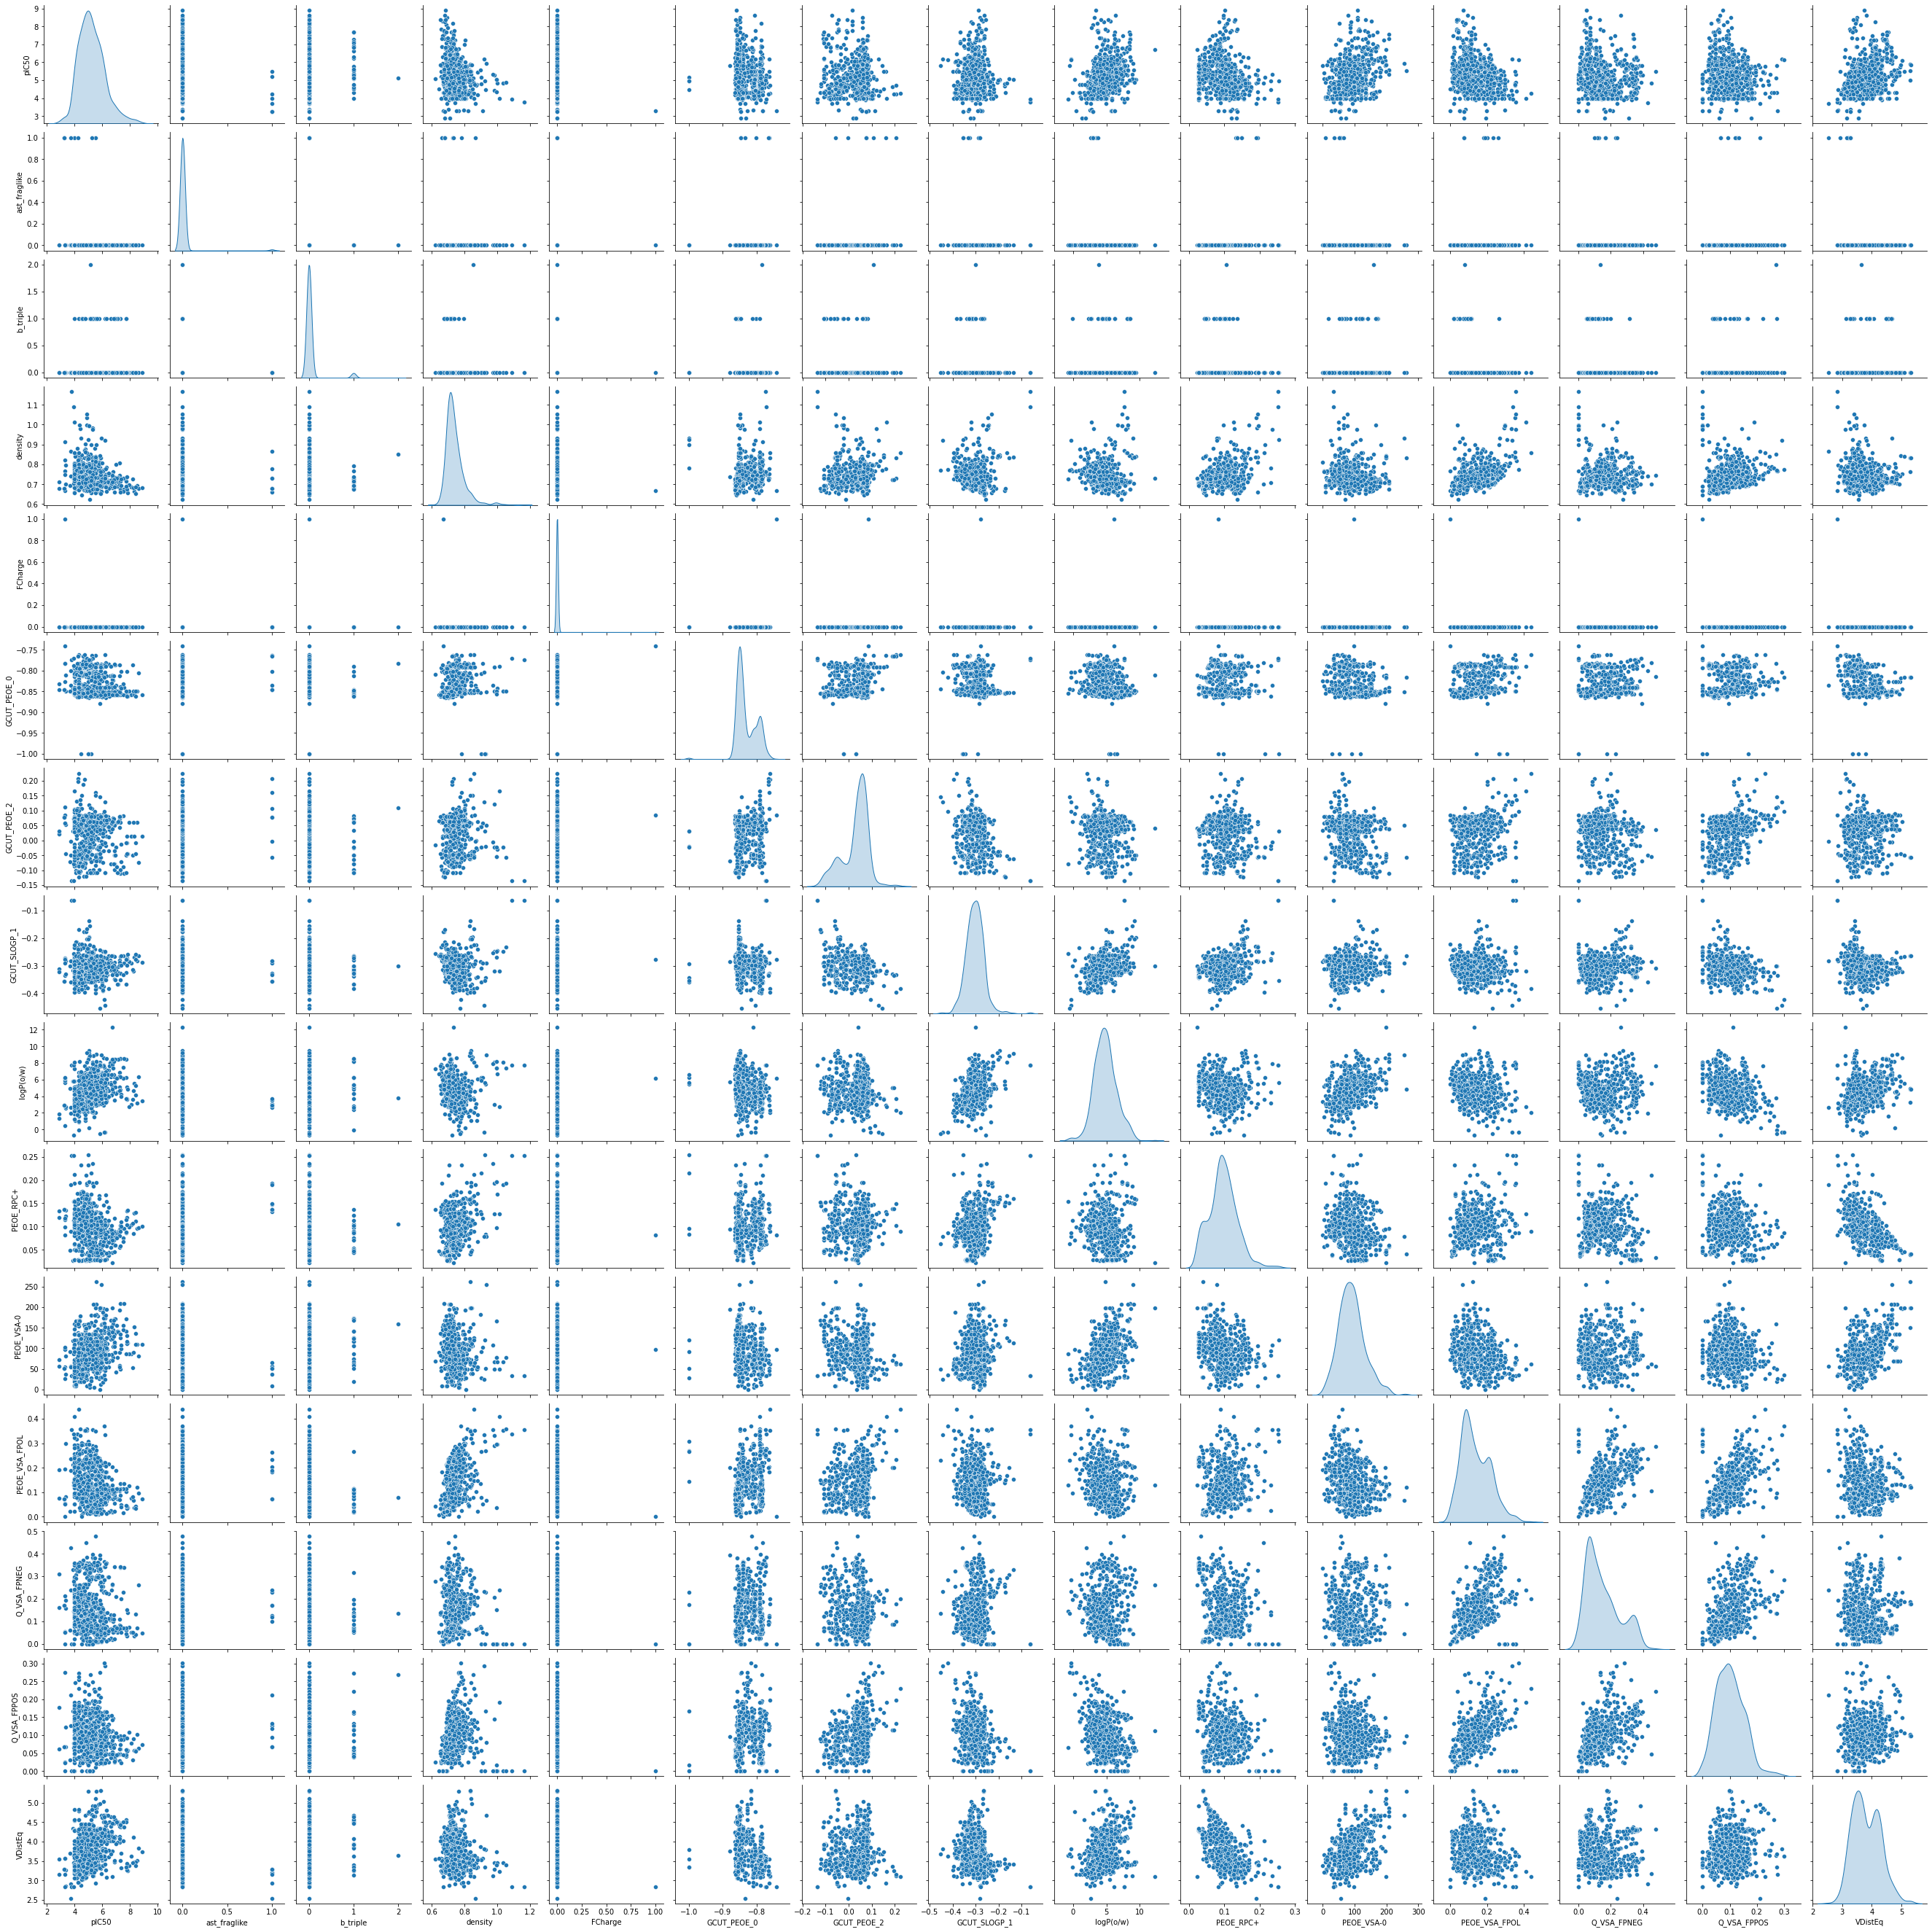

In [ ]:
# sns.pairplot(train_dataset['pIC50', 'PEOE_VSA-0', 'PEOE_VSA_FPOL', 'Q_VSA_FPNEG', 'Q_VSA_FPPOS', 'VDistEq'], diag_kind='kde')
sns.pairplot(train_dataset[['pIC50', 'ast_fraglike', 'b_triple', 'density', 'FCharge', 'GCUT_PEOE_0', 'GCUT_PEOE_2', 'GCUT_SLOGP_1', 'logP(o/w)', 'PEOE_RPC+', 'PEOE_VSA-0', 'PEOE_VSA_FPOL', 'Q_VSA_FPNEG', 'Q_VSA_FPPOS', 'VDistEq']], diag_kind='kde')


Let's also check the overall statistics. Note how each feature covers a very different range:

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pIC50,739.0,5.230572,0.942059,2.886057,4.554399,5.107905,5.795880,8.903090
ast_fraglike,739.0,0.010825,0.103551,0.000000,0.000000,0.000000,0.000000,1.000000
b_triple,739.0,0.043302,0.210221,0.000000,0.000000,0.000000,0.000000,2.000000
density,739.0,0.740359,0.059459,0.623129,0.704799,0.726139,0.761728,1.165184
FCharge,739.0,0.001353,0.036786,0.000000,0.000000,0.000000,0.000000,1.000000
GCUT_PEOE_0,739.0,-0.830788,0.030001,-1.000003,-0.850591,-0.842769,-0.805992,-0.740917
GCUT_PEOE_2,739.0,0.028658,0.056988,-0.136080,-0.000951,0.045015,0.065639,0.225401
GCUT_SLOGP_1,739.0,-0.304180,0.039617,-0.453681,-0.328187,-0.302856,-0.281533,-0.062663
logP(o/w),739.0,4.800084,1.666034,-0.705000,3.671480,4.692270,5.708380,12.269480
PEOE_RPC+,739.0,0.096308,0.039311,0.023210,0.073366,0.094702,0.117865,0.254438


## Split features from labels
Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('pIC50')
test_labels = test_features.pop('pIC50')

# **Normalization**
In the table of statistics it's easy to see how different the ranges of each feature are:


In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
pIC50,5.230572,0.942059
ast_fraglike,0.010825,0.103551
b_triple,0.043302,0.210221
density,0.740359,0.059459
FCharge,0.001353,0.036786
GCUT_PEOE_0,-0.830788,0.030001
GCUT_PEOE_2,0.028658,0.056988
GCUT_SLOGP_1,-0.304180,0.039617
logP(o/w),4.800084,1.666034
PEOE_RPC+,0.096308,0.039311


It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without feature normalization, normalization makes training much more stable.

## The Normalization layer
The tf.keras.layers.Normalization is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling Normalization.adapt:

In [ ]:
normalizer.adapt(np.array(train_features))

Calculate the mean and variance, and store them in the layer:

In [ ]:
print(normalizer.mean.numpy())

[[ 0.011  0.043  0.74   0.001 -0.831  0.029 -0.304  4.8    0.096 90.944
   0.138  0.148  0.101  3.815]]


When the layer is called, it returns the input data, with each feature independently normalized:

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 0.    0.    0.71  0.   -0.79 -0.06 -0.36  4.88  0.15 82.36  0.08  0.05
   0.04  3.22]]

Normalized: [[-0.1  -0.21 -0.5  -0.04  1.27 -1.49 -1.47  0.05  1.42 -0.21 -0.72 -1.
  -1.25 -1.29]]


# **Linear regression**
Before building a deep neural network model, start with linear regression using one and several variables.

## Linear regression with one variable
Begin with a single-variable linear regression to predict 'pIC50' from 'logP(o/w)'.

Training a model with **tf.keras** typically starts by defining the model architecture. Use a **tf.keras.Sequential** model, which represents a sequence of steps.

There are two steps in your single-variable linear regression model:

Normalize the 'logP(o/w)' input features using the **tf.keras.layers.Normalization** preprocessing layer.
Apply a linear transformation (y=mx+b) to produce 1 output using a linear layer (**tf.keras.layers.Dense**).
The number of inputs can either be set by the **input_shape** argument, or automatically when the model is run for the first time.

First, create a NumPy array made of the 'logP(o/w)' features. Then, instantiate the **tf.keras.layers.Normalization** and fit its state to the logP(o/w) data:

In [ ]:
logP = np.array(train_features['logP(o/w)'])

logP_normalizer = layers.Normalization(input_shape=[1,], axis=None)
logP_normalizer.adapt(logP)

Build the Keras Sequential model:

In [ ]:
logP_model = tf.keras.Sequential([
    logP_normalizer,
    layers.Dense(units=1)
])

logP_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model will predict 'pIC50' from 'logP(o/w)'.

Run the untrained model on the first 10 'logP(o/w)' values. The output won't be good, but notice that it has the expected shape of (10, 1):

In [ ]:
logP_model.predict(logP[:10])

array([[ 0.017],
       [-0.239],
       [-0.033],
       [-0.008],
       [ 0.162],
       [ 0.131],
       [-0.015],
       [ 0.07 ],
       [ 0.447],
       [ 0.437]], dtype=float32)

Once the model is built, configure the training procedure using the Keras **Model.compile** method. The most important arguments to compile are the **loss** and the **optimizer**, since these define what will be optimized (**mean_absolute_error**) and how (using the **tf.keras.optimizers.Adam**).

In [ ]:
logP_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0005),
    loss='mean_absolute_error')

Use Keras **Model.fit** to execute the training for 100 epochs:

In [ ]:
%%time
history = logP_model.fit(
    train_features['logP(o/w)'],
    train_labels,
    epochs=30,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 2.75 s, sys: 318 ms, total: 3.07 s
Wall time: 2.62 s


Visualize the model's training progress using the stats stored in the **history** object:

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
25,4.693032,4.741699,25
26,4.683424,4.732218,26
27,4.673884,4.723033,27
28,4.664336,4.713889,28
29,4.654722,4.704584,29


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [pIC50]')
  plt.legend()
  plt.grid(True)

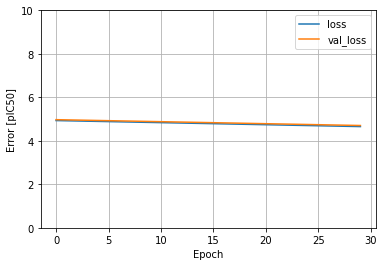

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['logP(o/w)_model'] = logP_model.evaluate(
    test_features['logP(o/w)'],
    test_labels, verbose=0)

Since this is a single variable regression, it's easy to view the model's predictions as a function of the input:

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = logP_model.predict(x)

In [ ]:
def plot_logP(x, y):
  plt.scatter(train_features['logP(o/w)'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlim([0, 15])
  plt.ylim([0, 10])
  plt.xlabel('logP(o/w)')
  plt.ylabel('pIC50')
  plt.legend()

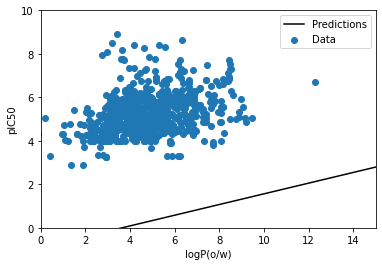

In [ ]:
plot_logP(x, y)

## Linear regression with multiple inputs
You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same *y=mx+b* except that *m* is a matrix and *b* is a vector.

Create a two-step Keras Sequential model again with the first layer being normalizer (tf.keras.layers.Normalization(axis=-1)) you defined earlier and adapted to the whole dataset:

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

array([[ 1.434],
       [ 0.937],
       [ 0.439],
       [ 0.092],
       [-0.056],
       [-0.853],
       [-1.109],
       [ 0.502],
       [ 0.016],
       [ 0.163]], dtype=float32)

When you call the model, its weight matrices will be built—check that the kernel weights (the *m* in *y=mx+b*) have a shape of (9, 1):

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(14, 1) dtype=float32, numpy=
array([[ 0.17 ],
       [-0.442],
       [ 0.171],
       [ 0.628],
       [-0.051],
       [ 0.388],
       [-0.34 ],
       [ 0.606],
       [ 0.115],
       [-0.287],
       [-0.17 ],
       [ 0.149],
       [-0.609],
       [-0.489]], dtype=float32)>

Configure the model with Keras **Model.compile** and train with **Model.fit** for 100 epochs:

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=30,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3.22 s, sys: 380 ms, total: 3.6 s
Wall time: 3.05 s


Using all the inputs in this regression model achieves a much lower training and validation error than the *Linear regression with one input*, which had one input:

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
25,4.780340,4.753859,25
26,4.760927,4.736120,26
27,4.740644,4.719733,27
28,4.720383,4.702125,28
29,4.700371,4.685340,29


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [pIC50]')
  plt.legend()
  plt.grid(True)

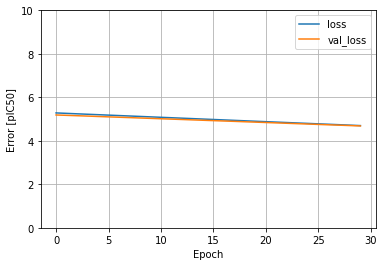

In [ ]:
plot_loss(history)

Collect the results on the test set for later:

In [ ]:
test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose=0)

# **Regression with a deep neural network (DNN)**
In the previous section, you implemented two linear models for single and multiple inputs.

Here, you will implement single-input and multiple-input DNN models.

The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

*   The normalization layer, as before (with **logP_normalizer** for a single-input model and **normalizer** for a multiple-input model).
*   Two hidden, non-linear, **Dense** layers with the ReLU (**relu**) activation function nonlinearity.
*   A linear Dense single-output layer.

Both models will use the same training procedure so the **compile** method is included in the **build_and_compile_model** function below.

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

## Regression using a DNN and a single input
Create a DNN model with only **'logP'** as input and **logP_normalizer** (defined earlier) as the normalization layer:

In [ ]:
dnn_logP_model = build_and_compile_model(logP_normalizer)

This model has quite a few more trainable parameters than the linear models:

In [ ]:
dnn_logP_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Train the model with Keras **Model.fit**:

In [ ]:
%%time
history = dnn_logP_model.fit(
    train_features['logP(o/w)'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 9.9 s, sys: 1.12 s, total: 11 s
Wall time: 10.8 s


This model does slightly better than the linear single-input **logP_model**:

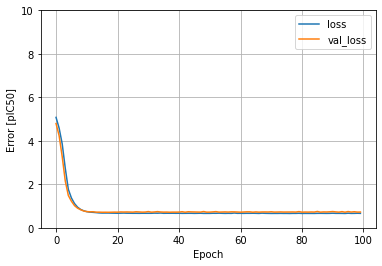

In [ ]:
plot_loss(history)

If you plot the predictions as a function of **'logP'**, you should notice how this model takes advantage of the nonlinearity provided by the hidden layers:

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_logP_model.predict(x)

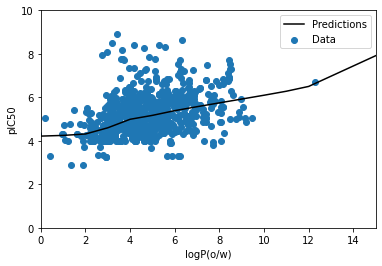

In [ ]:
plot_logP(x, y)

## Regression using a DNN and multiple inputs
Repeat the previous process using all the inputs. The model's performance slightly improves on the validation dataset.

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 14)               29        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 64)                960       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,214
Trainable params: 5,185
Non-trainable params: 29
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 9.6 s, sys: 1.07 s, total: 10.7 s
Wall time: 10.7 s


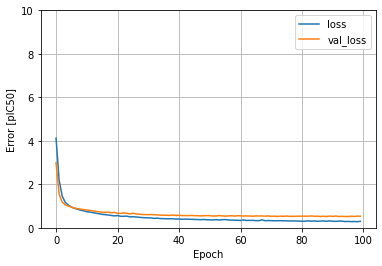

In [ ]:
plot_loss(history)

Collect the results on the test set:

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

# **Performance**
Since all models have been trained, you can review their test set performance:

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [pIC50]']).T

,Mean absolute error [pIC50]
logP(o/w)_model,0.690768
linear_model,0.613443
dnn_model,0.533453


These results match the validation error observed during training.

## Make predictions
You can now make predictions with the **dnn_model** on the test set using Keras **Model.predict** and review the loss:

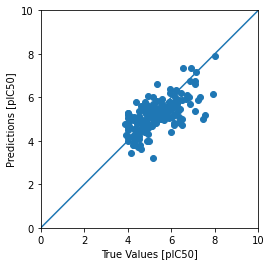

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [pIC50]')
plt.ylabel('Predictions [pIC50]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

It appears that the model predicts reasonably well.

Now, check the error distribution:

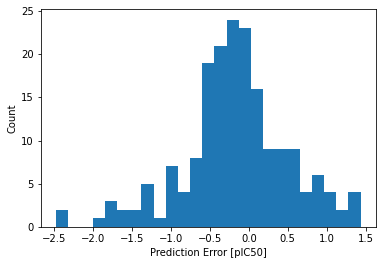

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [pIC50]')
_ = plt.ylabel('Count')


Save it for later use with **Model.save**:

In [ ]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


Reload the model, it gives identical output:

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [pIC50]']).T

,Mean absolute error [pIC50]
logP(o/w)_model,0.690768
linear_model,0.613443
dnn_model,0.533453
reloaded,0.533453
